In [690]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tslearn.clustering import silhouette_score
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import itertools

In [691]:
with open('./pickles/allPixelNDVIPoly.pickle', 'rb') as handle:
    allPixelNDVIPoly3 = pickle.load(handle)

with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)

with open('./pickles/kmeans_total_3_c3.pickle', 'rb') as handle:
    kmeans_total3 = pickle.load(handle)

with open('./pickles/kmeans_total_3_c3.pickle', 'rb') as handle:
    kmeans_total3_master = pickle.load(handle)


In [692]:
# Numero di cluster 

num_cluster = 3

allPixelNDVIPoly3 = allPixelNDVIPoly3[(newResa3<=11000) & (newResa3 >= 4000),:]
newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]

# Andiamo a calcolare una nuova metrica di coesione

In [693]:
km_one3 = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=100,random_state=0)
y_pred_one3 = km_one3.fit_predict(allPixelNDVIPoly3)

(array([ 1.,  0.,  0.,  2.,  1.,  1.,  1.,  0.,  2.,  2.,  0.,  3.,  4.,
         5.,  3.,  2.,  7.,  6., 10.,  4.,  4., 12.,  7., 10., 12.,  4.,
         8.,  9., 11.,  8., 10., 19., 14., 12., 13., 23., 15., 20., 17.,
        16., 31., 28., 21., 39., 27., 32., 18., 42., 25., 30., 31., 31.,
        34., 33., 27., 37., 42., 43., 34., 29., 18., 39., 27., 26., 27.,
        36., 20., 28., 26., 20., 24., 18., 24., 21., 19., 14., 24., 17.,
        13., 16., 16.,  5.,  9., 11.,  9.,  6.,  6.,  3.,  4.,  3.,  3.,
         2.,  0.,  1.,  0.,  2.,  1.,  0.,  0.,  1.]),
 array([ 4026.30004883,  4093.73803711,  4161.17626953,  4228.61425781,
         4296.05224609,  4363.49023438,  4430.92822266,  4498.36621094,
         4565.80419922,  4633.2421875 ,  4700.68017578,  4768.11816406,
         4835.55615234,  4902.99414062,  4970.43212891,  5037.87011719,
         5105.30810547,  5172.74609375,  5240.18408203,  5307.62207031,
         5375.06005859,  5442.49804688,  5509.93603516,  5577.37402344,
  

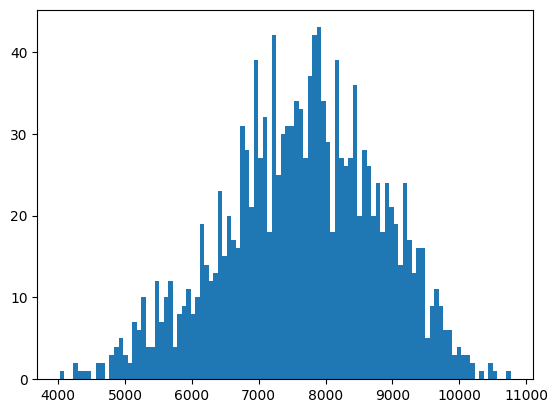

In [694]:
plt.hist(newResa3,100)

In [695]:
label_3 = np.ndarray([newResa3.shape[0]])
label_3_test = np.ndarray([newResa3.shape[0]])

for a,b in zip(newResa3,range(newResa3.shape[0])):
    if(a < np.quantile(newResa3,q=0.33)):
        label_3[b] = int(0) # resa bassa
        label_3_test[b] = int(0) # resa bassa
    elif(a > np.quantile(newResa3,q=0.33) and a < np.quantile(newResa3,q=0.66)):
        label_3[b] = int(1) # resa media
        label_3_test[b] = int(1) # resa media
    else:
        label_3[b] = int(2) # resa alta
        label_3_test[b] = int(2) # resa alta

In [696]:
print(np.median(newResa3))
print(np.quantile(newResa3,q=0.5))
print(label_3.shape)
print(label_3[label_3 == 0].shape)
print(label_3[label_3 == 1].shape)
print(np.arange(5))

7708.3
7708.2998046875
(1471,)
(486,)
(485,)
[0 1 2 3 4]


In [697]:
cluster_class_mapping = {}
df = pd.DataFrame(data=[])
for cluster in range(0,num_cluster):
    cluster_classes = label_3[y_pred_one3 == cluster]
    unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
    dominant_class = unique_classes[np.argmax(class_counts)]
    df[cluster] = class_counts
    print('Questo è class count '+ str(class_counts))
    print('Questo è class unique ',unique_classes)
    cluster_class_mapping[cluster] = dominant_class
print(df)

Questo è class count [240 260 149]
Questo è class unique  [0. 1. 2.]
Questo è class count [102 188 343]
Questo è class unique  [0. 1. 2.]
Questo è class count [144  37   8]
Questo è class unique  [0. 1. 2.]
     0    1    2
0  240  102  144
1  260  188   37
2  149  343    8


In [698]:
def best_cluster(matrice):
    a = np.arange(matrice.shape[0])
    permutation = list(itertools.permutations(a))
    obiettivo = {'max': 0,
                'perm':[]}

    for perm in permutation:
        somma = 0
        for elem,index in zip(perm,range(matrice.shape[0])):
            somma += matrice[index,elem]
        if(somma > obiettivo['max']):
            obiettivo['max'] = somma
            obiettivo['perm'] = perm
    print(obiettivo)

    test_map = {}
    for pippo,pluto in zip(obiettivo['perm'],range(matrice.shape[0])):
        test_map[pluto] = pippo
    return test_map

                 

In [699]:
conflitti = pd.DataFrame(data=[],columns=['cluster','classe'])
test_df = pd.DataFrame(data=[[240,102,8],[260,144,37],[149,188,344]])

print(test_df)
print(conflitti)

check = True

'''#while(check):
for a in test_df.columns:
    print('Questo è il massimo ',test_df[a].max(), ' e questa è il suo id ',test_df[a].idxmax())
    if( test_df[a].idxmax() in conflitti['classe'].values):
        print('test')
        if(test_df[conflitti['cluster'][conflitti['classe'] == test_df[a].idxmax()].values[0]].loc[test_df[a].idxmax()] < test_df[a].max()):
            indice = conflitti.index[conflitti['cluster'][conflitti['classe'] == test_df[a].idxmax()].values[0]].loc[test_df[a].idxmax()]
            conflitti.drop()
    else:
        new_row = pd.Series({'cluster': a, 'classe': test_df[a].idxmax()})
        conflitti = pd.concat([conflitti,new_row.to_frame().T],ignore_index=True)
    if(len(conflitti) == num_cluster):
        check = False
print(conflitti)'''

intervallo = [0,1,2]
intervallo_2 = [0,1,2]
while(check):
    for a in intervallo:
        for b in intervallo_2:
            if(test_df[a].max() == test_df.loc[b].max()):
                new_row = pd.Series({'cluster': a, 'classe': test_df[a].idxmax()})
                conflitti = pd.concat([conflitti,new_row.to_frame().T],ignore_index=True)
                test_df.drop(a, axis=1,inplace=True)
                test_df.drop(b, axis=0,inplace=True)
                intervallo.remove(a)
                intervallo_2.remove(b)
        else:
            continue
        
    if(len(intervallo) == 0):
        check = False

     0    1    2
0  240  102    8
1  260  144   37
2  149  188  344
Empty DataFrame
Columns: [cluster, classe]
Index: []


In [700]:
dizionario = {}
print(type(dizionario))
print(bool(dizionario))
dizionario['a'] = 5
print(bool(dizionario))
for a in dizionario:
    print(dizionario[a])

<class 'dict'>
False
True
5


In [701]:
class_possibility = {}
            
for z in range(num_cluster):
    class_possibility[z] = np.arange(num_cluster)

print(class_possibility)
class_possibility[0] = np.delete(class_possibility[0],2)
print(class_possibility)

{0: array([0, 1, 2]), 1: array([0, 1, 2]), 2: array([0, 1, 2])}
{0: array([0, 1]), 1: array([0, 1, 2]), 2: array([0, 1, 2])}


In [702]:
# Associazione del cluster i-esimo con la classe i-esima

list_of_mapping = []

for x in range(0,int(155/5)):

    list_of_mapping.append([])

    for y in range(0,int(155/5)):

        if(kmeans_total3[x,y] is not None):

            cluster_class_mapping = {}
            matrice_elementi = np.ndarray((num_cluster,num_cluster))

            for cluster in range(0,num_cluster):


                cluster_classes = label_3[kmeans_total3[x,y] == cluster]
                unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
                matrice_elementi[cluster,:] = class_counts
                
                #dominant_class = unique_classes[np.argmax(class_counts)]
                #cluster_class_mapping[cluster] = dominant_class


            list_of_mapping[-1].append(best_cluster(matrice_elementi))    
        else:
            continue

{'max': 596.0, 'perm': (0, 2, 1)}
{'max': 552.0, 'perm': (1, 2, 0)}
{'max': 708.0, 'perm': (1, 0, 2)}
{'max': 772.0, 'perm': (2, 1, 0)}
{'max': 781.0, 'perm': (2, 0, 1)}
{'max': 788.0, 'perm': (2, 0, 1)}
{'max': 777.0, 'perm': (2, 0, 1)}
{'max': 768.0, 'perm': (2, 1, 0)}
{'max': 757.0, 'perm': (2, 1, 0)}
{'max': 758.0, 'perm': (2, 1, 0)}
{'max': 755.0, 'perm': (2, 0, 1)}
{'max': 757.0, 'perm': (2, 0, 1)}
{'max': 747.0, 'perm': (2, 0, 1)}
{'max': 740.0, 'perm': (1, 2, 0)}
{'max': 709.0, 'perm': (1, 2, 0)}
{'max': 699.0, 'perm': (1, 2, 0)}
{'max': 697.0, 'perm': (1, 2, 0)}
{'max': 704.0, 'perm': (1, 0, 2)}
{'max': 716.0, 'perm': (1, 0, 2)}
{'max': 757.0, 'perm': (1, 0, 2)}
{'max': 729.0, 'perm': (1, 2, 0)}
{'max': 728.0, 'perm': (1, 0, 2)}
{'max': 725.0, 'perm': (1, 0, 2)}
{'max': 724.0, 'perm': (1, 0, 2)}
{'max': 724.0, 'perm': (1, 0, 2)}
{'max': 725.0, 'perm': (1, 0, 2)}
{'max': 725.0, 'perm': (1, 0, 2)}
{'max': 727.0, 'perm': (1, 0, 2)}
{'max': 724.0, 'perm': (2, 0, 1)}
{'max': 747.0,

In [703]:
for a in range(len(list_of_mapping)):
    for b in range(len(list_of_mapping[a])):
        print(list_of_mapping[a][b])

{0: 0, 1: 2, 2: 1}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 0, 2: 2}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 0, 2: 1}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 2, 1: 0, 2: 1}
{0: 1, 1: 2, 2: 0}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 1, 2: 0}
{0: 1, 1: 0, 2: 2}
{0: 2, 1: 0, 2: 1}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 2, 1: 1, 2: 0}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0,

In [704]:
'''difference = pd.DataFrame(data=[],columns=['num_cluster','num_class'])

for i in range(num_cluster):
    if(i != cluster_class_mapping[i]):

        new_row = pd.Series({'num_cluster': i, 'num_class': cluster_class_mapping[i]})
        difference = pd.concat([difference,new_row.to_frame().T],ignore_index=True)'''

list_of_difference = []

for a in range(len(list_of_mapping)):

    list_of_difference.append([])

    for b in range(len(list_of_mapping[a])):

        difference = pd.DataFrame(data=[],columns=['num_cluster','num_class'])

        for i in range(num_cluster):
            if(i != list_of_mapping[a][b][i]):

                new_row = pd.Series({'num_cluster': i, 'num_class': list_of_mapping[a][b][i]})
                difference = pd.concat([difference,new_row.to_frame().T],ignore_index=True)
        
        list_of_difference[-1].append(difference)

In [705]:
for a in range(len(list_of_difference)):
    for b in range(len(list_of_difference[a])):
        print(list_of_difference[a][b])

  num_cluster num_class
0           1         2
1           2         1
  num_cluster num_class
0           0         1
1           1         2
2           2         0
  num_cluster num_class
0           0         1
1           1         0
  num_cluster num_class
0           0         2
1           2         0
  num_cluster num_class
0           0         2
1           1         0
2           2         1
  num_cluster num_class
0           0         2
1           1         0
2           2         1
  num_cluster num_class
0           0         2
1           1         0
2           2         1
  num_cluster num_class
0           0         2
1           2         0
  num_cluster num_class
0           0         2
1           2         0
  num_cluster num_class
0           0         2
1           2         0
  num_cluster num_class
0           0         2
1           1         0
2           2         1
  num_cluster num_class
0           0         2
1           1         0
2           2   

In [714]:
'''indici = []

for a in difference['num_cluster']:
    indici.append([
    index for index in range(len(y_pred_one3))
    if y_pred_one3[index] == a
])

for ind,true_value in zip(indici,difference['num_class']):
    for a in ind:
        y_pred_one3[a] = true_value'''

for x in range(len(list_of_difference)):

    for y in range(len(list_of_difference[x])):

        indici = []

        if(kmeans_total3[x,y] is not None):

            #indici.append([])

            for a in list_of_difference[x][y]['num_cluster']:
                indici.append([
                index for index in range(len(kmeans_total3[x,y]))
                if kmeans_total3[x,y][index] == a
            ])
                
            print(indici)

            for ind,true_value in zip(indici,list_of_difference[x][y]['num_class']):

                kmeans_total3_copy = np.copy(kmeans_total3_master[x,y])
                print(np.unique(kmeans_total3_copy))

                for a in ind:
                    #kmeans_total3_copy[a] = true_value
                    
                print(np.unique(kmeans_total3_copy))
                kmeans_total3[x,y] = kmeans_total3_copy
                #print(np.unique(kmeans_total3[x,y]))

        else:
            continue

[[4, 7, 11, 12, 18, 19, 20, 38, 39, 40, 52, 53, 54, 55, 56, 57, 60, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 149, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 172, 173, 181, 182, 183, 184, 185, 186, 187, 188, 189, 191, 192, 194, 195, 209, 210, 211, 212, 213, 214, 215, 221, 222, 239, 240, 241, 242, 243, 244, 245, 270, 271, 272, 273, 274, 275, 276, 277, 278, 283, 284, 285, 303, 305, 306, 307, 308, 309, 310, 311, 313, 314, 319, 320, 338, 340, 341, 342, 343, 344, 345, 346, 347, 350, 353, 375, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 389, 415, 416, 420, 421, 422, 423, 424, 425, 426, 427, 451, 452, 453, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 493, 494, 504, 505, 506, 507, 508, 512, 513, 514, 515, 537, 549, 551, 552, 553, 561, 562, 579, 594, 596, 597, 604, 605, 606, 607, 634, 641, 642, 643, 644,

In [707]:
list_of_mapping_test = []

for x in range(0,int(155/5)):

    list_of_mapping_test.append([])

    for y in range(0,int(155/5)):

        if(kmeans_total3[x,y] is not None):

            cluster_class_mapping = {}
            matrice_elementi = np.ndarray((num_cluster,num_cluster))

            for cluster in range(0,num_cluster):


                cluster_classes = label_3[kmeans_total3[x,y] == cluster]
                unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
                matrice_elementi[cluster,:] = class_counts
                
                #dominant_class = unique_classes[np.argmax(class_counts)]
                #cluster_class_mapping[cluster] = dominant_class


            list_of_mapping_test[-1].append(best_cluster(matrice_elementi))    
        else:
            continue

{'max': 596.0, 'perm': (0, 2, 1)}
{'max': 552.0, 'perm': (1, 2, 0)}
{'max': 708.0, 'perm': (1, 0, 2)}
{'max': 772.0, 'perm': (2, 1, 0)}
{'max': 781.0, 'perm': (2, 0, 1)}
{'max': 788.0, 'perm': (2, 0, 1)}
{'max': 777.0, 'perm': (2, 0, 1)}
{'max': 768.0, 'perm': (2, 1, 0)}
{'max': 757.0, 'perm': (2, 1, 0)}
{'max': 758.0, 'perm': (2, 1, 0)}
{'max': 755.0, 'perm': (2, 0, 1)}
{'max': 757.0, 'perm': (2, 0, 1)}
{'max': 747.0, 'perm': (2, 0, 1)}
{'max': 740.0, 'perm': (1, 2, 0)}
{'max': 709.0, 'perm': (1, 2, 0)}
{'max': 699.0, 'perm': (1, 2, 0)}
{'max': 697.0, 'perm': (1, 2, 0)}
{'max': 704.0, 'perm': (1, 0, 2)}
{'max': 716.0, 'perm': (1, 0, 2)}
{'max': 757.0, 'perm': (1, 0, 2)}
{'max': 729.0, 'perm': (1, 2, 0)}
{'max': 728.0, 'perm': (1, 0, 2)}
{'max': 725.0, 'perm': (1, 0, 2)}
{'max': 724.0, 'perm': (1, 0, 2)}
{'max': 724.0, 'perm': (1, 0, 2)}
{'max': 725.0, 'perm': (1, 0, 2)}
{'max': 725.0, 'perm': (1, 0, 2)}
{'max': 727.0, 'perm': (1, 0, 2)}
{'max': 724.0, 'perm': (2, 0, 1)}
{'max': 747.0,

In [708]:
for a in range(len(list_of_mapping_test)):
    for b in range(len(list_of_mapping_test[a])):
        print(list_of_mapping_test[a][b])

{0: 0, 1: 2, 2: 1}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 0, 2: 2}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 0, 2: 1}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 2, 1: 0, 2: 1}
{0: 1, 1: 2, 2: 0}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 1, 2: 0}
{0: 2, 1: 0, 2: 1}
{0: 2, 1: 1, 2: 0}
{0: 1, 1: 0, 2: 2}
{0: 2, 1: 0, 2: 1}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 2, 1: 1, 2: 0}
{0: 1, 1: 2, 2: 0}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0, 2: 2}
{0: 1, 1: 0,

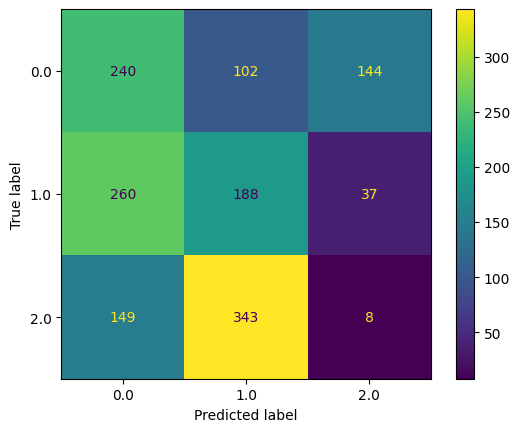

In [709]:
ConfusionMatrixDisplay.from_predictions(label_3,y_pred_one3)
plt.show()

In [710]:
accuracy = str(accuracy_score(label_3,y_pred_one3))
precision = str(precision_score(label_3,y_pred_one3,average= None))
recall = str(recall_score(label_3,y_pred_one3,average= None))

print("accuratezza " + accuracy)
print("precision " + precision)
print("recall " + recall)

accuratezza 0.2963970088375255
precision [0.36979969 0.29699842 0.04232804]
recall [0.49382716 0.38762887 0.016     ]


In [711]:
matrice_precision = np.zeros([int(155/5),int(155/5)])
matrice_recall = np.zeros([int(155/5),int(155/5)])
matrice_accuracy = np.zeros([int(155/5),int(155/5)])

for x in range(0,int(155/5)):

    for y in range(0,int(155/5)):

        if(kmeans_total3[x,y] is not None):
            matrice_precision[x,y] = precision_score(label_3,kmeans_total3[x,y],average= 'macro')
            matrice_recall[x,y] = recall_score(label_3,kmeans_total3[x,y],average= 'macro')
            matrice_accuracy[x,y] = accuracy_score(label_3,kmeans_total3[x,y])

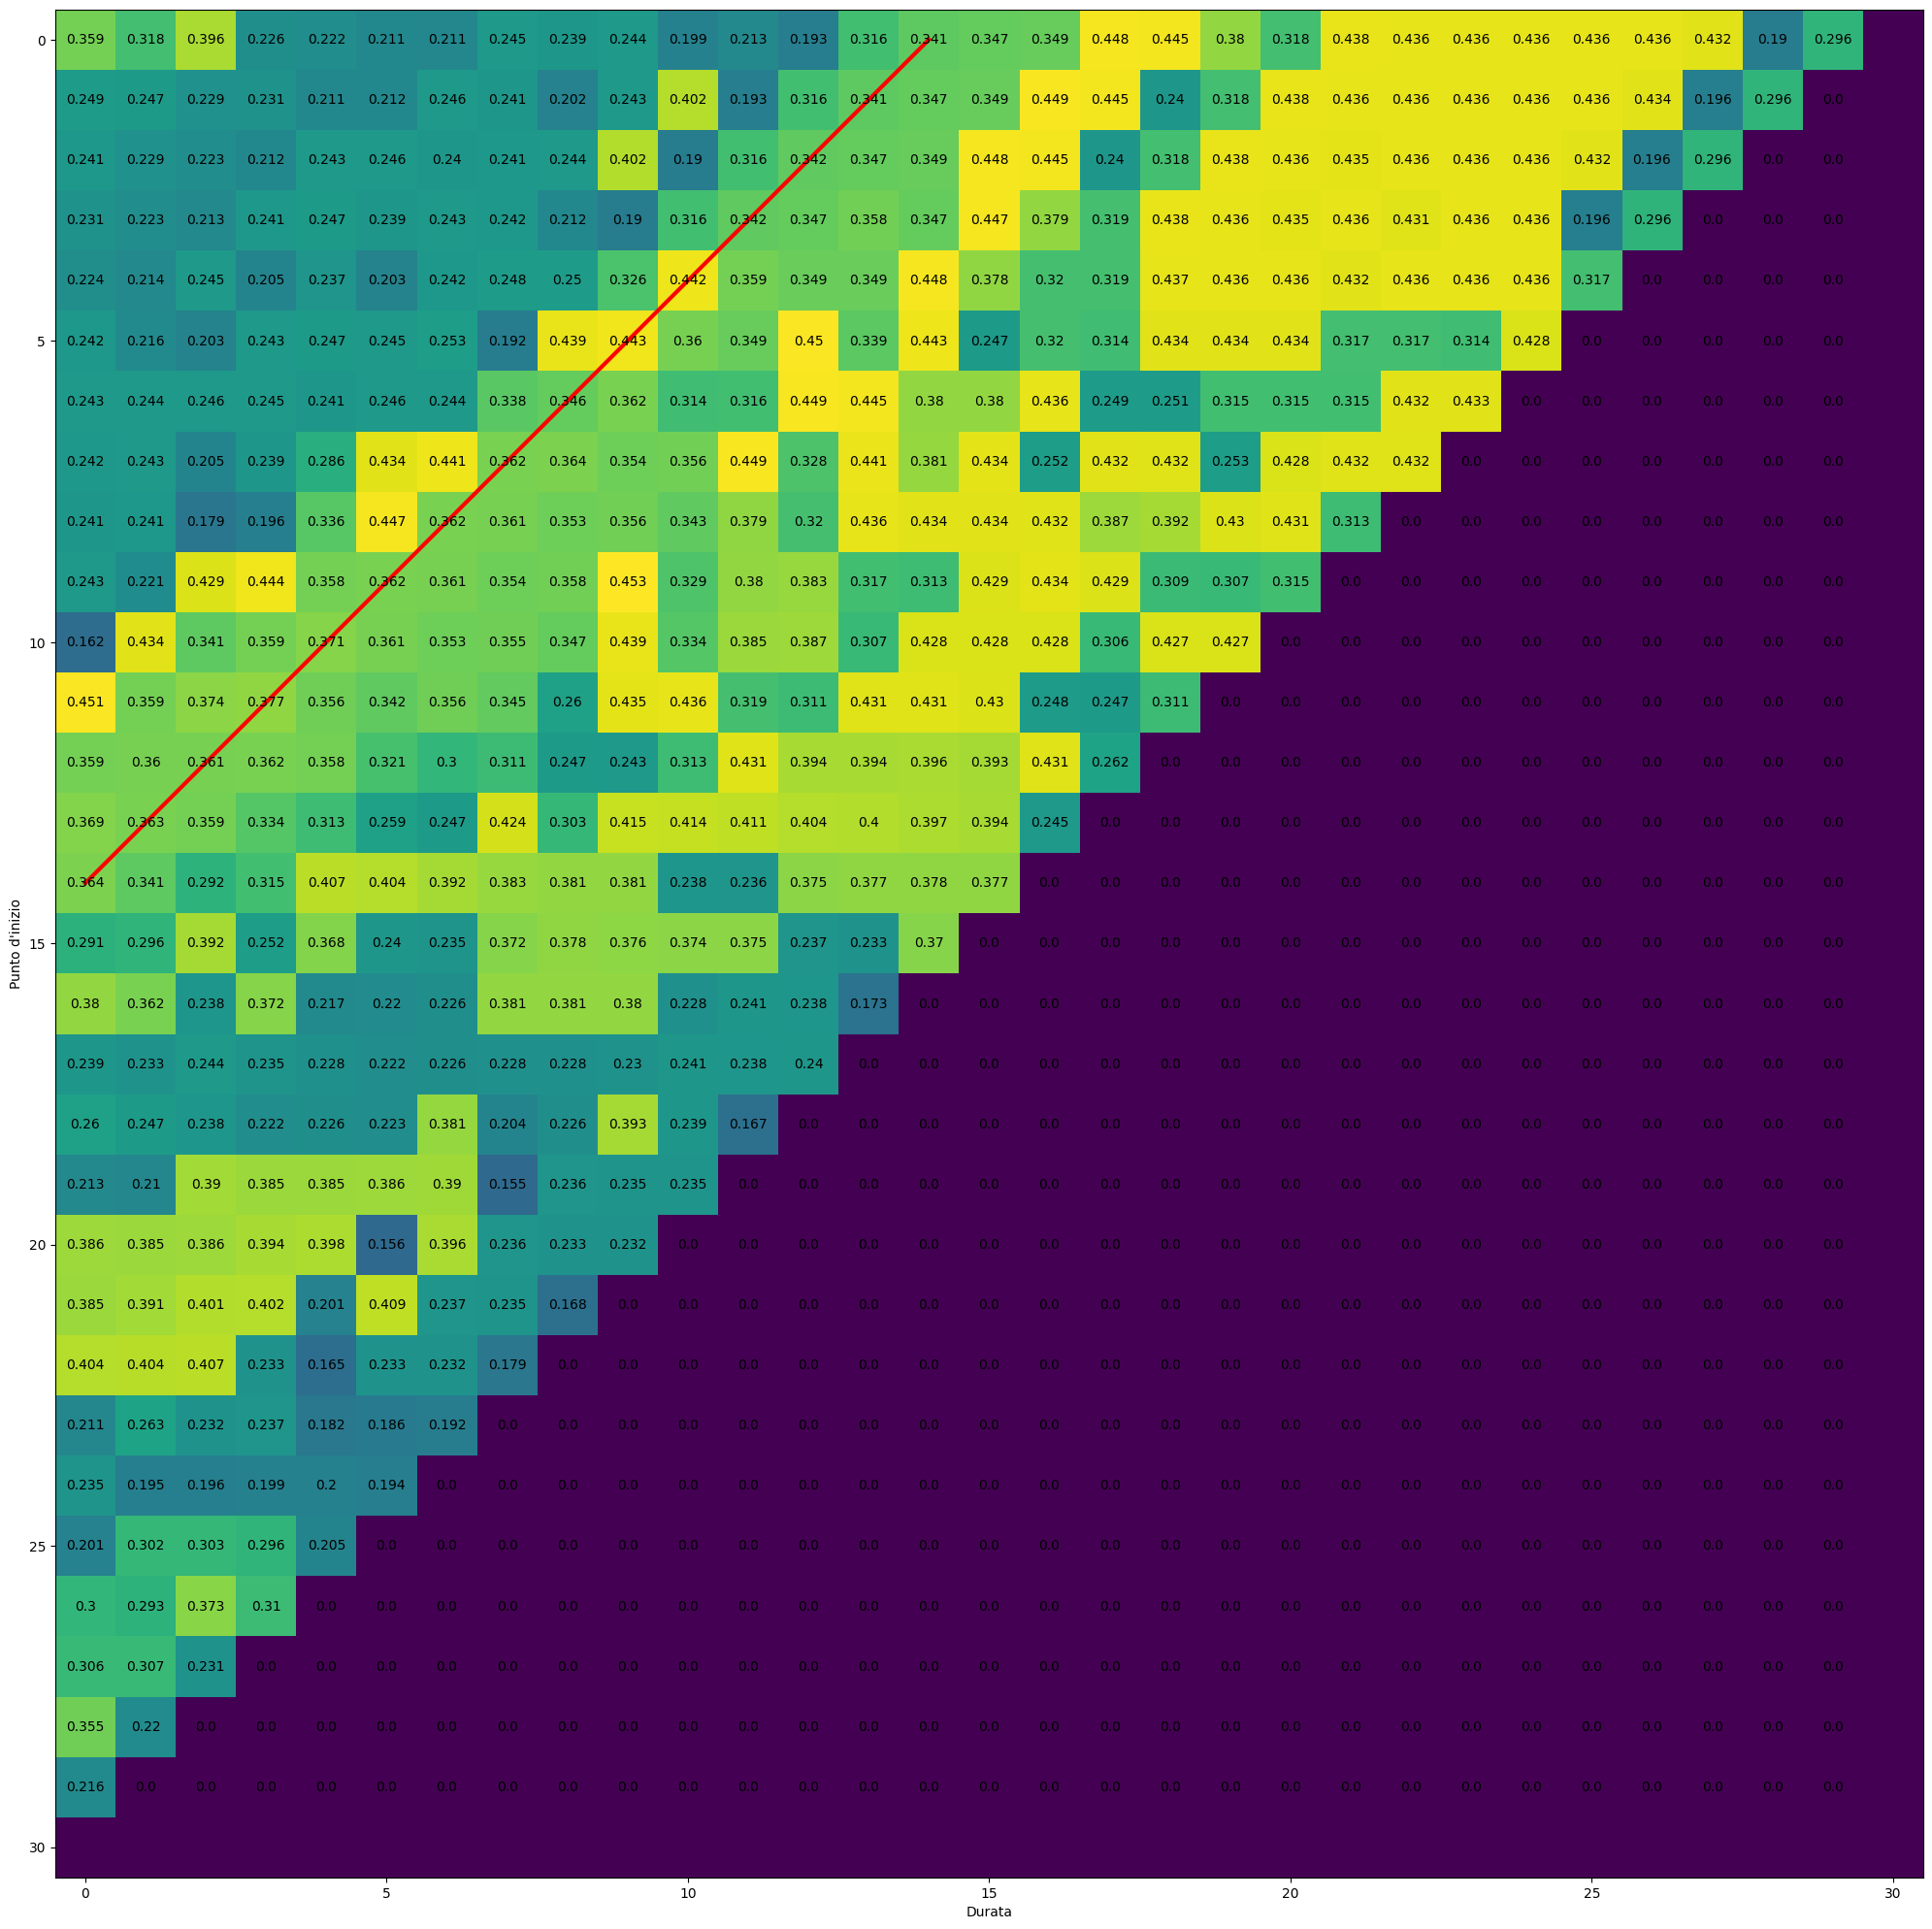

In [712]:
fig, ax = plt.subplots()
image = ax.imshow(matrice_accuracy[:,:])
line_start = [0, np.floor(71/5)]
line_end = [np.floor(71/5), 0]
plt.plot(line_start, line_end, color="red", linewidth=3)
plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(x):
    for j in range(y):
        c = np.round(matrice_accuracy[i,j],decimals=3)
        ax.text(j, i, str(c), va='center', ha='center')
plt.show()

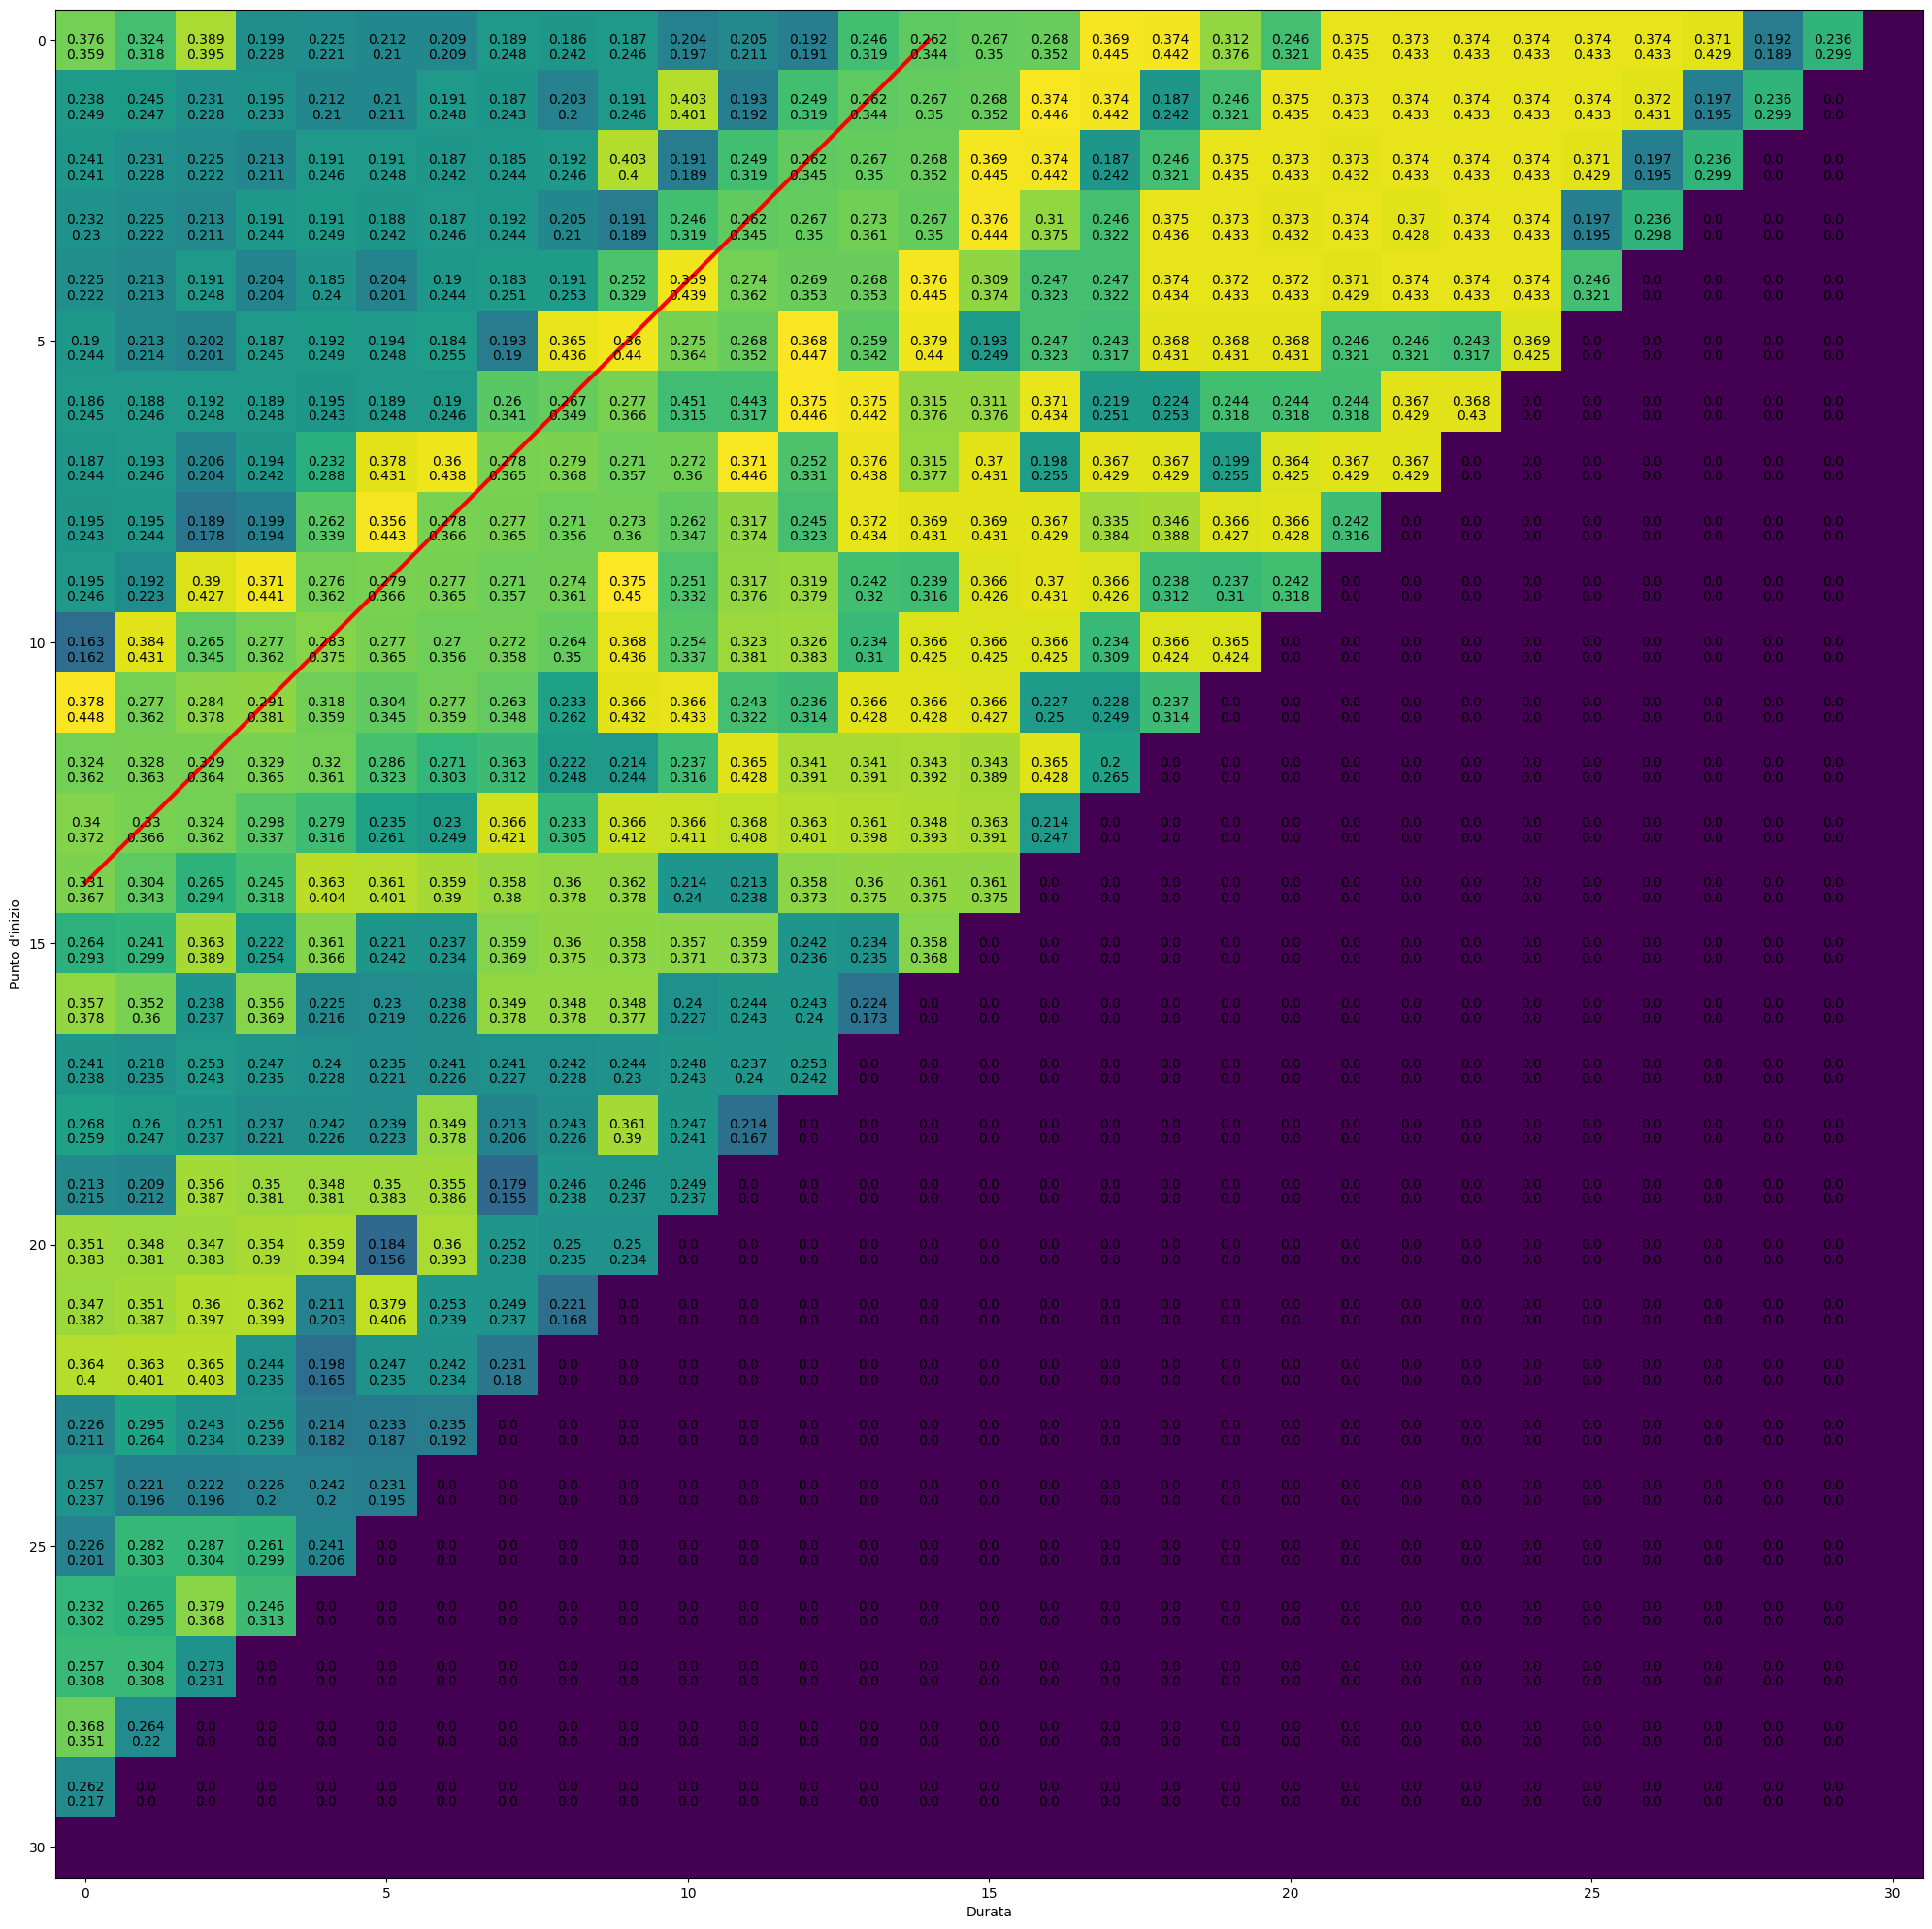

In [713]:
fig, ax = plt.subplots()
image = ax.imshow(matrice_accuracy[:,:])
line_start = [0, np.floor(71/5)]
line_end = [np.floor(71/5), 0]
plt.plot(line_start, line_end, color="red", linewidth=3)
plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(x):
    for j in range(y):
        c = np.round(matrice_precision[i,j],decimals=3)
        ax.text(j, i, str(c), va='center', ha='center')
        d = np.round(matrice_recall[i,j],decimals=3)
        ax.text(j,(i+0.25),str(d),va='center', ha='center')
plt.show()